<a href="https://colab.research.google.com/github/hx2406/hw1/blob/main/wk6Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

pd.options.display.float_format = '{:.4f}'.format

# Part 1: create function to call yahoo finance to get prices and return the returns
# for a given time period (default is start="2020-01-01", end="2025-02-01") - 2 points
def YahooData2returns(symbol,start="2020-01-01", end="2025-02-01"):
  prices = get_stock_data(symbol,start,end)
  returns = get_returns(prices.values)

  return(returns)
    # YahooData = data from Yahoo Finance
    # Steps:
    # Extract 'Adj Close' column
    # Extract values from 'Adj Close' column to transform to a simple array
    # Calculate and return the lagged returns


def get_stock_data(symbol,start="2020-01-01", end="2025-02-01"):
    print(symbol)
    data = yf.download(symbol, start, end)
    data = yf.download(symbol)
    prices = data['Close']
    return prices

# Example usage
prices = get_stock_data('GS')
print(type(prices))
pricevec = prices.values


def get_returns(pricevec):
    n = len(pricevec)
    ratiovec = pricevec[1:n] / pricevec[:n-1]
    returns = ratiovec - 1  # assuming the return calculation is (price_t / price_t-1) - 1
    return returns

# Example of using get_returns
returns = get_returns(pricevec)
print(returns)


GS
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
[[-0.01776255]
 [-0.017179  ]
 [ 0.09107663]
 ...
 [-0.03985063]
 [ 0.0205286 ]
 [-0.04297448]]


-4.207451206709509


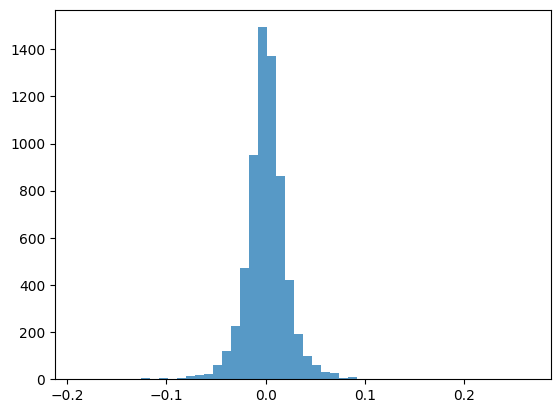

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Part 2 - given a set of returns calculate the VaR and allow for
# the notional amount to be an input variable "principal with" a default value of 1
# 2 points

def VaR(r, confidence=.95, principal = 1):
    out = principal * np.percentile(r, 100 * (1 - confidence))
    # This function returns the left tail value and displays a histogram
    # r = a vector of stock returns
    # principal = investment initial value
    # <your work>
    # out = principal * positively stated value of r at the 1-alpha percentile
    return (out)

var = VaR(returns, 0.975, 100)
print(var)

plt.hist(returns, bins=50, alpha=0.75)
plt.show()


1.9559040131826662


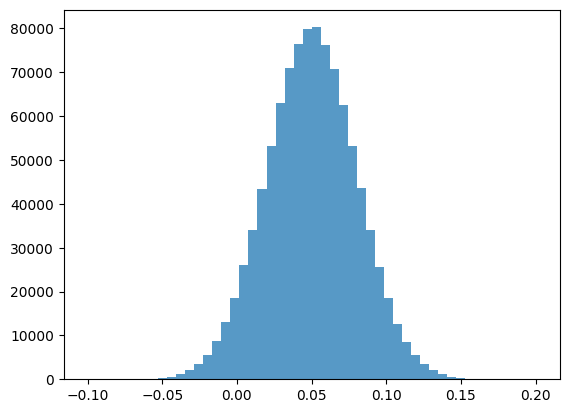

True


In [3]:
# Partial demonstration
def percent_var(r, confidence):
    # This function returns the left tail value and displays a histogram
    # r = a vector of stock percent returns
    # out = positively stated value of r at the 1-alpha percentile

    plt.hist(r, bins=50, alpha=0.75)
    plt.show()

    out = np.percentile(r, (1 - confidence) * 100)  # Calculate the percentile
    return abs(out)  # Return the absolute value of the calculated percentile

# Example tools: percentile
returns = np.random.normal(0, 1, 10000)
print(np.percentile(returns, 97.72))

# Unit test
r = np.random.normal(0.05, 0.03, 1000000)
probability2SD = norm.cdf(2)  # Probability under normal curve within 2 standard deviations

my_confidence = probability2SD
my_percent_var = percent_var(r, my_confidence )
print(np.round(my_percent_var, 2) == 0.01)

In [4]:
import numpy as np

# Part 3 - given a set of returns calculate the ES and allow for
# the notional amount to be an input variable "principal with" a default value of 1
# 2 points

def ES(losses, confidence=None, VaR=None, use_PnL=False):
    """
    Calculate the Expected Shortfall (ES) of losses.

    losses: array of positively stated loss values
    confidence: risk level (e.g., 0.99 for 99%)
    VaR: dollar value specifying the VaR threshold

    return Expected Shortfall as the average of losses exceeding VaR
    """
    if VaR is None:
        # If VaR is not provided, determine VaR based on the confidence percentile
        VaR = np.percentile(losses, 100 * confidence)

    # Calculate ES as the average of losses exceeding the VaR threshold
    es_value = np.mean(losses[losses > VaR])
    return es_value

# Unit test
u = np.random.uniform(0, 100, 100000)

# Test the ES function with an confidence of 0.8
es_confidence = ES(losses=u, confidence=0.8)
print('ES with confidence:', np.round(es_confidence, 0) == 90)

# Test the ES function with a VaR of 80
es_var = ES(losses=u, VaR=80)
print('ES with VaR:', np.round(es_var, 0) == 90)




ES with confidence: True
ES with VaR: True


In [16]:
# Problem 4 - 2 points
# Given a stock symbol get the returns and calculate the .99 %-ile VaR on a $1MM investment
def VaRStock(symbol, confidence=.99, principal = 1000000,start="2020-01-01", end="2025-02-01"):


  # Get prices using functions defined above above
  returns = YahooData2returns(symbol,start,end)
  print(returns)


  # Feed returns into VaR function
  var=VaR(returns, confidence, principal = 1)

  return(var)

  # Example usage
var_apple = VaRStock("AAPL")  # Calls the function
print("The 99% VaR on a $1MM investment for Apple is:", var_apple)



[*********************100%***********************]  1 of 1 completed

AAPL



[*********************100%***********************]  1 of 1 completed

[[-0.05217056]
 [-0.07339746]
 [ 0.02475048]
 ...
 [-0.00882244]
 [-0.00080527]
 [-0.00405108]]
The 99% VaR on a $1MM investment for Apple is: -0.07022063262884348


In [21]:
# Problem 5 - 2 points
# Given a stock symbol get the returns and calculate the .975 %-ile ES (expected shortfall) on a $1MM investment

# Get returns for stock using function above

# Calculate .975 %-ile and seleect returns

def ESStock(symbol, confidence=0.975, principal=1000000, start="2020-01-01", end="2025-02-01"):

    # 1) Get the stock's returns using your YahooData2returns function
    returns = YahooData2returns(symbol, start, end)

    # 2) Convert returns into "positively stated losses"
    #    Negative returns become positive losses; positive returns become negative or zero.
    #    This way, ES() sees a distribution where large losses are large positive numbers.
    losses = -returns  # e.g., -0.02 return => +0.02 loss

    # 3) Calculate the Expected Shortfall (ES) at the desired confidence level
    #    ES(losses, confidence=..., ...) must already be defined in your code
    es_value = ES(losses, confidence=confidence)

    # 4) Scale by principal (default: \$1MM)
    es_dollars = es_value * principal

    return es_dollars

es_975 = ESStock("AAPL")  # This returns the ES value
print("97.5% ES on $1MM for AAPL:", es_975)




[*********************100%***********************]  1 of 1 completed

AAPL



[*********************100%***********************]  1 of 1 completed

97.5% ES on $1MM for AAPL: 75803.42154606848
